In [1]:
from IPython.display import display, HTML
import scipy.constants as sc
from scipy.optimize import fsolve
from ipywidgets import interact, widgets
%matplotlib notebook

import numpy as np
import cmath
import matplotlib.pyplot as plt
import scipy.constants as sc
plt.rcParams.update({
    "text.usetex": True,
    'text.latex.preamble': r"\usepackage{amsmath} \boldmath"
})
import os
import h5py

print(os.getpid())
%cd ../

12585
/media/work/docs/codes/QuCF/scripts-py


In [2]:
# --- Launch to change cells' width ---
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import pylib.mix as mix
import pylib.qucf_read as qucf_r
import pylib.qucf_oracle as qucf_o
import pylib.qucf_matrix_D as qucf_m
import kin1d1d as kin
path_ = "../simulations/KIN1D1D/"
path_D_ = "../simulations/KIN1D1D/matrices-D/"
file_name_oracle_ = "circuit_OH"
path_test_ = "../simulations/test-simplified/"
path_cl_ = "../results/KIN1D1D-results/"
path_save_ = "../results/KIN1D1D-results/figs/"
file_name_oracle_ = "circuit_OH"

In [4]:
# ---------------------------------------------------------------
# --- Read the matrix ---
# ---------------------------------------------------------------
mix.reload_module(qucf_r)
mix.reload_module(kin)

print()
dd_44 = qucf_r.read_matrix(path_D_, "flat_44_OUTPUT.hdf5") #  nv = 4, nx = 4 

print()
dd_45 = qucf_r.read_matrix(path_D_, "flat_45_OUTPUT.hdf5") #  nv = 4, nx = 5 


print()
dd_54 = qucf_r.read_matrix(path_D_, "flat_54_OUTPUT.hdf5") #  nx = 5, nv = 4

print()
dd_55 = qucf_r.read_matrix(path_D_, "flat_55_OUTPUT.hdf5") #  nx = 5, nv = 5


# print()
# dd_64 = qucf_r.read_matrix(path_D_, "flat_64_OUTPUT.hdf5") #  nx = 6, nv = 4

# print()
# dd_65 = qucf_r.read_matrix(path_D_, "flat_65_OUTPUT.hdf5") #  nx = 6, nv = 5

# print()
# dd_66 = qucf_r.read_matrix(path_D_, "flat_66_OUTPUT.hdf5") #  nx = 6, nv = 6

print("\n --- Classical data (A matrix) ---")
cl_44 = kin.read_matrix(path_cl_, "out_4_4_w1.2_Lx100_Lv4_flat.hdf5")
cl_45 = kin.read_matrix(path_cl_, "out_4_5_w1.2_Lx100_Lv4_flat.hdf5")
cl_46 = kin.read_matrix(path_cl_, "out_4_6_w1.2_Lx100_Lv4_flat.hdf5")
cl_47 = kin.read_matrix(path_cl_, "out_4_7_w1.2_Lx100_Lv4_flat.hdf5")

cl_54 = kin.read_matrix(path_cl_, "out_5_4_w1.2_Lx100_Lv4_flat.hdf5")
cl_55 = kin.read_matrix(path_cl_, "out_5_5_w1.2_Lx100_Lv4_flat.hdf5")
cl_56 = kin.read_matrix(path_cl_, "out_5_6_w1.2_Lx100_Lv4_flat.hdf5")
cl_57 = kin.read_matrix(path_cl_, "out_5_7_w1.2_Lx100_Lv4_flat.hdf5")

cl_64 = kin.read_matrix(path_cl_, "out_6_4_w1.2_Lx100_Lv4_flat.hdf5")
cl_65 = kin.read_matrix(path_cl_, "out_6_5_w1.2_Lx100_Lv4_flat.hdf5")
cl_66 = kin.read_matrix(path_cl_, "out_6_6_w1.2_Lx100_Lv4_flat.hdf5")
cl_67 = kin.read_matrix(path_cl_, "out_6_7_w1.2_Lx100_Lv4_flat.hdf5")

# cl_74 = kin.read_matrix(path_cl_, "out_7_4_w1.2_Lx100_Lv4_flat.hdf5")
# cl_75 = kin.read_matrix(path_cl_, "out_7_5_w1.2_Lx100_Lv4_flat.hdf5")
# cl_76 = kin.read_matrix(path_cl_, "out_7_6_w1.2_Lx100_Lv4_flat.hdf5")
# cl_77 = kin.read_matrix(path_cl_, "out_7_7_w1.2_Lx100_Lv4_flat.hdf5")


Reading the matrix from: flat_44_OUTPUT.hdf5
from the path: ../simulations/KIN1D1D/matrices-D/
date of the simulation:  06-06-2023 08:57:47
matrix name:  U_BE
N = 512

Reading the matrix from: flat_45_OUTPUT.hdf5
from the path: ../simulations/KIN1D1D/matrices-D/
date of the simulation:  06-23-2023 15:42:09
matrix name:  U_BE
N = 1024

Reading the matrix from: flat_54_OUTPUT.hdf5
from the path: ../simulations/KIN1D1D/matrices-D/
date of the simulation:  06-23-2023 15:48:52
matrix name:  U_BE
N = 1024

Reading the matrix from: flat_55_OUTPUT.hdf5
from the path: ../simulations/KIN1D1D/matrices-D/
date of the simulation:  06-23-2023 15:52:48
matrix name:  U_BE
N = 2048

Reading the matrix from: flat_64_OUTPUT.hdf5
from the path: ../simulations/KIN1D1D/matrices-D/
date of the simulation:  07-31-2023 16:30:41
matrix name:  U_BE
N = 2048

Reading the matrix from: flat_65_OUTPUT.hdf5
from the path: ../simulations/KIN1D1D/matrices-D/
date of the simulation:  08-01-2023 09:35:20
matrix name:  U

In [39]:
# ------------------------------------------------------------
# --- Chosen structures ---
# ------------------------------------------------------------

# dd_c_, nx_work, nv_work = dict(cl_44), 4, 4
# dd_c_, nx_work, nv_work = dict(cl_45), 4, 5
# dd_c_, nx_work, nv_work = dict(cl_46), 4, 6
# dd_c_, nx_work, nv_work = dict(cl_47), 4, 7

# dd_c_, nx_work, nv_work = dict(cl_54), 5, 4
# dd_c_, nx_work, nv_work = dict(cl_55), 5, 5
# dd_c_, nx_work, nv_work = dict(cl_56), 5, 6
# dd_c_, nx_work, nv_work = dict(cl_57), 5, 7

# dd_c_, nx_work, nv_work = dict(cl_64), 6, 4
# dd_c_, nx_work, nv_work = dict(cl_65), 6, 5
# dd_c_, nx_work, nv_work = dict(cl_66), 6, 6
dd_c_, nx_work, nv_work = dict(cl_67), 6, 7

# dd_c_, nx_work, nv_work = dict(cl_74), 7, 4
# dd_c_, nx_work, nv_work = dict(cl_75), 7, 5
# dd_c_, nx_work, nv_work = dict(cl_76), 7, 6
# dd_c_, nx_work, nv_work = dict(cl_77), 7, 7

In [40]:
# ---------------------------------------------------------------
# --- Extrapolate the matrix D_F ---
# ---------------------------------------------------------------
mix.reload_module(kin)
mix.reload_module(qucf_m)

Nx_work = 1 << nx_work
Nv_work = 1 << nv_work
Nvar_work = Nx_work * Nv_work

grid_44 = qucf_m.SectionsGrid__(kin.init_matrix_and_circuit(dd_44))
grid_45 = qucf_m.SectionsGrid__(kin.init_matrix_and_circuit(dd_45))
grid_54 = qucf_m.SectionsGrid__(kin.init_matrix_and_circuit(dd_54))

oo_extr = qucf_m.Extrapolation__([grid_44, grid_45, grid_54])
oo_extr.create_extrapolation_template()

oo_circ = kin.init_circuit_of_defined_size(nx_work, nv_work, 3, 3)
D_F = oo_extr.reconstruct_matrix(oo_circ)

All grids have the same number of sizes.
The correct number of grids is provided.
Grids have similiar structure.


In [12]:
# ------------------------------------------------------------------------------------------
# --- [OPTIONAL] Compare the reconstructed matrix D with the calculated one if available ---
# ------------------------------------------------------------------------------------------
mix.reload_module(qucf_o)
mix.reload_module(mix)

dd_compare = dd_44

D_to_compare = dd_compare["A"][0:Nvar_work, 0:Nvar_work]
mix.compare_matrices(D_F, D_to_compare, 1e-12)
del dd_compare, D_to_compare

The matrices have different sizes.


In [41]:
# -------------------------------------------------------------
# --- Normalize the matrix and define the circuit structure ---
# -------------------------------------------------------------
mix.reload_module(mix)
mix.reload_module(qucf_o)
mix.reload_module(kin)

A_norm = kin.normalize_matrix_A(dd_c_["A"], D_F, nv_work)
A_F  = A_norm[0:Nvar_work, 0:Nvar_work]
# A_CE = A_norm[0:Nvar_work, Nvar_work:2*Nvar_work]
# A_Cf = A_norm[Nvar_work:2*Nvar_work, 0:Nvar_work]
# A_S  = A_norm[Nvar_work:2*Nvar_work, Nvar_work:2*Nvar_work]
del A_norm

N_nz_D = mix.compute_Nz(D_F, prec = oo_circ.prec_)
N_nz_A = mix.compute_Nz(A_F, prec = oo_circ.prec_)
print()
print("N-nz(D_F): {:d}".format(N_nz_D))
print("N-nz(A_F): {:d}".format(N_nz_A))

# for actual calculations:
B_fixed = kin.extract_fixed_matrix_from_F(nx_work, nv_work, A_F, D_F)

original matrix >>>
amax. value: 			5.040e+00
amin.(excl. zero) value: 	3.372e-05


normalized matrix >>>
amax. value: 			1.682e-03
amin.(excl. zero) value: 	1.125e-08


N-nz(D_F): 40832
N-nz(A_F): 40832
N-nonzero:  24576


In [42]:
# -----------------------------------------------
# --- Computation of oracle angles ---
# -----------------------------------------------
mix.reload_module(mix)
mix.reload_module(qucf_o)

# Rearrange angles:
grid_sections = qucf_o.create_grid_of_sections(oo_circ, B_fixed)

# -- Create sections of sets (sets = groups):
sys_gates_ = qucf_o.SystemGates__(
    oo_circ, 
#     qucf_o.create_groups(oo_circ, grid_sections)            # Option 1
    qucf_o.create_groups_neighbor(oo_circ, grid_sections) # Option 2
)

# Recreate the matrix using the ORIGINAL groups
print("--- Reconstruction using original groups ---")
mix.compare_matrices(sys_gates_.reconstruct_matrix_using_GROUPS(), B_fixed, prec = oo_circ.prec_)
sys_gates_.count_groups()

# # Split groups (optional):
# sys_gates_.n_split_ = 1
# sys_gates_.split_groups()
# sys_gates_.split_groups()
# sys_gates_.split_groups()
# sys_gates_.split_groups()
# sys_gates_.split_groups()
# print("--- After the splitting ---")
# sys_gates_.count_groups()

# Sort groups:
sys_gates_.sort_groups()

# Extend the gates:
sys_gates_.set_rows_limit_for_non_extension(4)
sys_gates_.extend_sorted_groups(B_fixed)

# merge groups:
sys_gates_.merge_groups()
print("--- After the merging ---")
sys_gates_.count_groups()

# preliminary correction (optional):
sys_gates_.correct_close_groups()

# add correcting groups:
sys_gates_.correct_groups(B_fixed)
print("--- After adding the correcting groups ---")
sys_gates_.count_groups()

# Recreate the matrix using the CORRECTED groups
print("--- Reconstruction using corrected groups ---")
mix.compare_matrices(sys_gates_.reconstruct_matrix_using_GRID(), B_fixed, prec = oo_circ.prec_)
sys_gates_.count_groups()

# Construct the circuit:
print("--- Circuit construction ---")
sys_gates_.construct_circuit_OH(path_, file_name_oracle_)

--- Reconstruction using original groups ---
Matrix size: 8192
the same within precision  1e-12
N = 8192
Number of groups: 128

--- After the merging ---
N = 8192
Number of groups: 115



/media/work/docs/codes/QuCF/scripts-py/env/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/media/work/docs/codes/QuCF/scripts-py/env/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


--- After adding the correcting groups ---
N = 8192
Number of groups: 872

--- Reconstruction using corrected groups ---
Matrix size: 8192
the same within precision  1e-12
N = 8192
Number of groups: 872

--- Circuit construction ---
N-input-registers = 2 with [6, 7] qubits
N-ancilla-registers = 2 with [3, 3] qubits
Total number of input qubits: 13
Matrix size that can be encoded: 8192
N-gates: 1582
N-gates (assuming Rc as a single gate): 794


In [ ]:


scaling_gates = [
  # nx, nv, N_nonzero, N_gates (Rc as 1)
    [4,  4,       784,    246],
    [4,  5,      1536,    265],
    [4,  6,      3040,    297],
    [4,  7,      6048,    361],
    
    [5,  4,      1584,    390],
    [5,  5,      3104,    409],
    [5,  6,      6144,    441],
    [5,  7,     12224,    505],
    
    [6,  4,      3184,    678],
    [6,  5,      6240,    697],
    [6,  6,     12352,    729],
    [6,  7,     24576,    794],
    
    [7, 4,  ],
    [7, 5,  ],
    [7, 6,  ],
    [7, 7,  ]
]

In [ ]:
# Merging-Corecting-NONneighbor:
# 3x3, Nz = 200:  n_split = 0 -> 200  gates 
# 3x4, Nz = 384:  n_split = 0 -> 269  gates 
# 3x5, Nz = 752:  n_split = 0 -> 252  gates 

# 4x3, Nz = 408:  n_split = 0 -> 408 gates 
# 4x4, Nz = 784:  n_split = 0 -> 461 gates 
# 4x5, Nz = 1536: n_split = 0 -> 443 gates 

# 5x3, Nz = 824:  n_split = 0 -> 824 gates
# 5x4, Nz = 1584: n_split = 0 -> 844 gates
# 5x5, Nz = 3104: n_split = 0 -> 828 gates (n_split = 1, 5 iters -> 828 gates)   


# 6x3, Nz = 1656: n_split = 0 -> 1656 gates
# 6x4, Nz = 3184: n_split = 0 -> 1615 gates
# 6x5, Nz = : n_split = 0 ->  gates
# 6x6, Nz = 12352: n_split = 0 -> 1604 gates


# Merging-Corecting-neighbor:
# 3x3, Nz = 200:  n_split = 0 -> 163  gates 
# 4x4, Nz = 784:  n_split = 0 -> 467  gates 
# 5x5, Nz = 3104: n_split = 0 -> 1020 gates


# # Data for the oracle scaling with Merging-Corecting-NONneighbor:
# items_data = [
#   # nx, nv, N_nonzero, N_gates (Rc as 1)
#     [3,  3,       200,    200],
#     [3,  4,       384,    269],
#     [3,  5,       752,    252],
#     [4,  3,       408,    408],
#     [4,  4,       784,    461],
#     [4,  5,      1536,    443],
#     [5,  3,       824,    824],
#     [5,  4,      1584,    844],
#     [5,  5,      3104,    828]
# ]

In [57]:
# -------------------------------------------------------------------------------------------------------------
# --- [OPTIONAL] Compare the matrix obtained from QC simulation of the oracle with the block-encoded matrix ---
# -------------------------------------------------------------------------------------------------------------
mix.reload_module(qucf_r)

dd_res = qucf_r.read_matrix(path_, "flat_OUTPUT.hdf5") 

A_F_recon = dd_res["A"][0:Nvar_work, 0:Nvar_work]
B_fixed_recon = kin.extract_fixed_matrix_from_F(oo_circ, A_F_recon, D_F)

mix.compare_matrices(B_fixed_recon, B_fixed, prec = 1e-10)
del A_F_recon, B_fixed_recon

Reading the matrix from: flat_OUTPUT.hdf5
from the path: ../simulations/KIN1D1D/
date of the simulation:  08-09-2023 16:07:06
matrix name:  U_BE
N = 512
N-nonzero: 784
the same within precision  1e-10


<IPython.core.display.Javascript object>


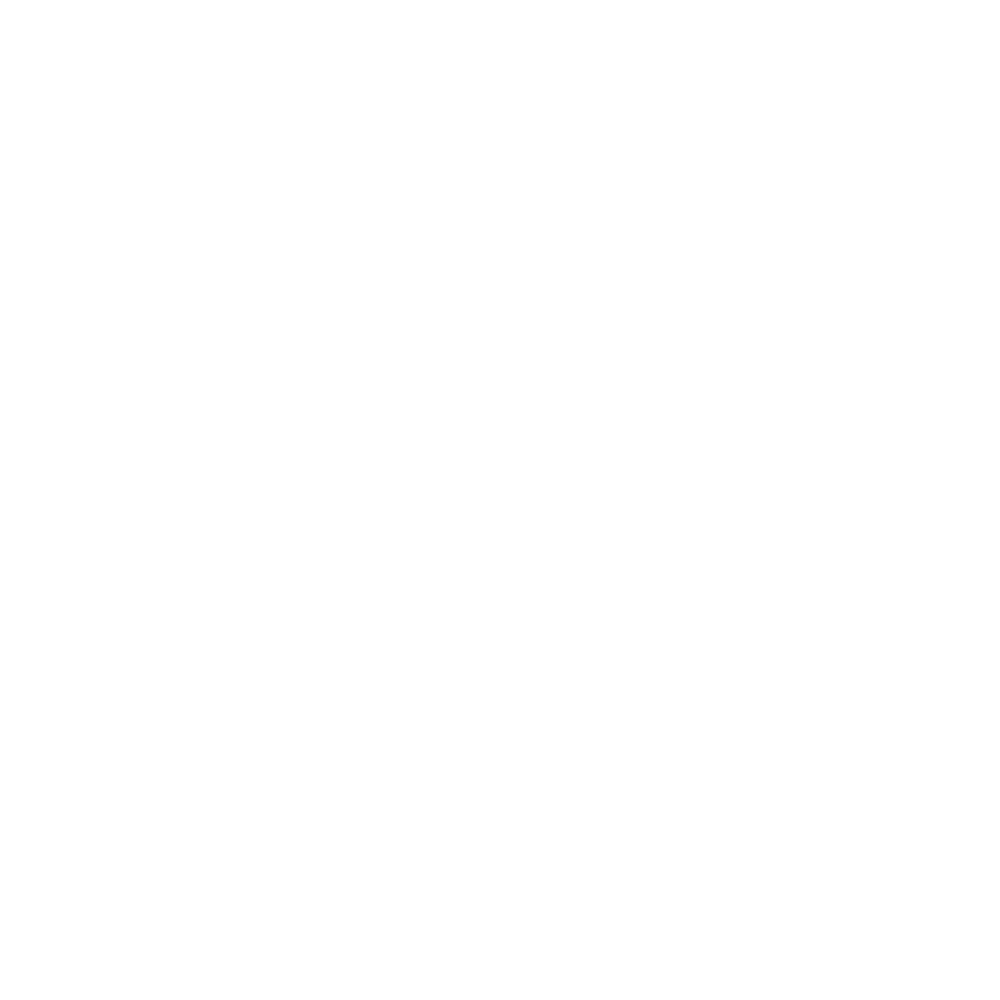

In [10]:
# --------------------------------------------------------------
# --- PLOT the matrix structure in different colors ---
# --------------------------------------------------------------
mix.reload_module(mix)
mix.reload_module(kin)

fig_B_colored_structure = kin.plot_colored_A_structure(
    Nx, Nv, 
    B_fixed, D_F, A_CE, A_Cf, A_S,
    flag_save = True, 
    path_save = path_save_, 
    fontsize = 20, 
    cmap='bwr'
)

In [28]:
# ---------------------------------------------------------------
# --- Function to print matrix subblocks ---
# ---------------------------------------------------------------
mix.reload_module(mix)
def print_submatrix(dd, B):
    nx, nv = dd["regs"]["rx"], dd["regs"]["rv"]
    Nx, Nv = 1<<dd["regs"]["rx"], 1<<dd["regs"]["rv"]
    
    print("****** Nv: {:d} *************************************".format(Nv))
    
#     ir_x, ic_x = 0, 0 # x[0], diag
#     ir_x, ic_x = 0, 1 # V-f: x[0], diag+1
#     ir_x, ic_x = 0, 2 # V-f: x[0], diag+2
#     ir_x, ic_x = 0, 3 # V-f: x[0], diag+3

#     ir_x, ic_x = 1, 0 # V-f: x[1], diag-1
#     ir_x, ic_x = 1, 1 # V-f: x[1], diag
#     ir_x, ic_x = 1, 2 # V-f: x[1], diag+1
#     ir_x, ic_x = 1, 3 # V-f: x[1], diag+2

#     ir_x, ic_x = 2, 1 # V-f: x[1], diag-1
#     ir_x, ic_x = 2, 2 # V-f: x[1], diag
#     ir_x, ic_x = 2, 3 # V-f: x[1], diag+1

#     ir_x, ic_x = 3, 2 # V-f: x[1], diag-1
#     ir_x, ic_x = 3, 3 # V-f: x[1], diag
#     ir_x, ic_x = 3, 4 # V-f: x[1], diag+1

#     ir_x, ic_x = Nx-1, Nx-4 # V-f: x[1], diag-3
#     ir_x, ic_x = Nx-1, Nx-3 # V-f: x[1], diag-2
#     ir_x, ic_x = Nx-1, Nx-2 # V-f: x[1], diag-1
    ir_x, ic_x = Nx-1, Nx-1 # V-f: x[1], diag

    
    # --------------------------------------------------
    Nr_print, Nc_print = Nv, Nv
    ir_start, ic_start = Nv * ir_x, Nv * ic_x
    
    
    mix.print_subblock_colored(
        B, 
        ir_start, ic_start,
        Nr_print, Nc_print,
        ff=[6, 3, "f"], 
        n_in_row = Nc_print, 
        gap_be = " ", 
    )
    
# -------------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------------
# print_submatrix(cl_33, np.real(A_F_norm)) 
# print_submatrix(cl_33, np.imag(A_F_norm)) 

# print_submatrix(cl_44, np.real(cl_44["A"])) 
# print_submatrix(cl_55, np.real(cl_55["A"])) 

# print_submatrix(cl_44, np.imag(cl_44["A"])) 
# print_submatrix(cl_55, np.imag(cl_55["A"]))

# *** PRINT MATRICES D of different sizes ***
print_submatrix(dd_44, np.real(dd_44["A"]))  # dd["A"] is the matrix D, which is real, but we put real explicitely to reduce the size of the printed matrix;
print_submatrix(dd_55, np.real(dd_55["A"]))

****** Nv: 16 *************************************
--- 0:   0.125  0.088  0.088  0.062  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 1:   0.088  0.177  0.062  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 2:   0.000  0.088  0.125  0.062  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 3:   0.000  0.000  0.062  0.125  0.088  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 4:   0.000  0.000  0.000  0.062  0.177  0.088  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 5:   0.000  0.000  0.000  0.000  0.088  0.177  0.088  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 6:   0.000  0.000  0.000  0.000  0.000  0.088  0.177  0.062  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 7:   0.000  0.000  0.000  0.000  0.000  0.000  0.088  0.125  0.062  0.000  0.000  0.000  0.000  0.000  0

In [27]:
# ---------------------------------------------------------------
# --- Function to print matrix subblocks ---
# ---------------------------------------------------------------
mix.reload_module(mix)
def print_submatrix_several_subblocks(dd, BB):
    nx, nv = dd["regs"]["rx"], dd["regs"]["rv"]
    Nx, Nv = 1<<dd["regs"]["rx"], 1<<dd["regs"]["rv"]
    
    print("\n\n*******************************************************************************")
    print("****** Nv: {:d} *************************************".format(Nv))
    
    ircs = [
#         [0, 0],  # x[0], diag
#         [1, 1],  # x[1], diag
#         [2, 2],  # x[2], diag
        [5, 5],  
#         [6, 6], 
#         [7, 7],
        [8, 8], 
#         [Nx-2, Nx-2],
#         [Nx-1, Nx-1],
    ]
    
    # --------------------------------------------------
    Nr_print, Nc_print = Nv, Nv
    for counter in range(len(ircs)):
        ir_start, ic_start = Nv * ircs[counter][0], Nv * ircs[counter][1]
        
        print("\n---------------------------------------------------------")
        print("ir_start, ic_start (in Nv): {:d}, {:d}".format(ircs[counter][0], ircs[counter][1]))

        print("--- REAL PART ---")
        mix.print_subblock_colored(
            np.real(BB), 
            ir_start, ic_start,
            Nr_print, Nc_print,
#             ff=[6, 3, "f"], 
            ff=[10, 12, "e"],
            n_in_row = Nc_print, 
            gap_be = " ", 
        )
#         print("--- IMAG PART ---")
#         mix.print_subblock_colored(
#             np.imag(BB), 
#             ir_start, ic_start,
#             Nr_print, Nc_print,
#             ff=[6, 3, "f"], 
#             n_in_row = Nc_print, 
#             gap_be = " ", 
#         )
    
# -------------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------------

# BB = np.divide(dd_c_["A"], dd_q_["A"], out=np.zeros_like(dd_c_["A"]), where = dd_q_["A"]!=0)
# print_submatrix_several_subblocks(dd_q_, BB) 
# del BB

# print_submatrix_several_subblocks(
#     dd_q_, 
#     np.divide(dd_c_["A"], dd_q_["A"], out=np.zeros_like(dd_c_["A"]), where = dd_q_["A"]!=0)
# ) 
# print_submatrix_several_subblocks(dd_q_, np.divide(A_F_norm, D_F, out=np.zeros_like(A_F_norm), where = D_F!=0)) 
# print_submatrix_several_subblocks(dd_44, B_fixed_44) 

print_submatrix_several_subblocks(dd_44, B_fixed) 



*******************************************************************************
****** Nv: 16 *************************************

---------------------------------------------------------
ir_start, ic_start (in Nv): 5, 5
--- REAL PART ---
--- 0:  1.412893134474e-04 -4.995331582391e-04 3.996265265913e-04 -1.412893134474e-04 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
--- 1:  9.990663164783e-05 -9.990663164783e-05 1.412893134474e-04 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
--- 2:  0.000000000000e+00 9.990663164783e-05 -1.412893134474e-04 1.412893134474e-04 0.000000000000e+00 0.000000000000e+00 0.0000

In [9]:
# ---------------------------------------------------------------
# --- Function to print matrix subblocks (using absolute indices) ---
# ---------------------------------------------------------------
mix.reload_module(mix)
def print_submatrix_several_subblocks_absolute_ins(dd, BB):
    nx, nv = dd["regs"]["rx"], dd["regs"]["rv"]
    Nx, Nv = 1<<dd["regs"]["rx"], 1<<dd["regs"]["rv"]
    
    print("\n\n*******************************************************************************")
    print("****** Nv: {:d} *************************************".format(Nv))
    
    Nv = 16
    ircs = [
        [0, 0],  
        [16, 16], 
        [32, 32], 
#         [48, 48], 
    ]

    
    # --------------------------------------------------
    Nr_print, Nc_print = Nv, Nv
    for counter in range(len(ircs)):
        ir_start, ic_start = ircs[counter][0], ircs[counter][1]
        
        print("\n---------------------------------------------------------")
        print("ir_start, ic_start (in Nv): {:d}, {:d}".format(ircs[counter][0], ircs[counter][1]))

        print("--- REAL PART ---")
        mix.print_subblock_colored(
            np.real(BB), 
            ir_start, ic_start,
            Nr_print, Nc_print,
#             ff=[6, 3, "f"], 
            ff=[10, 6, "e"],
            n_in_row = Nc_print, 
            gap_be = " ", 
        )
#         print("--- IMAG PART ---")
#         mix.print_subblock_colored(
#             np.imag(BB), 
#             ir_start, ic_start,
#             Nr_print, Nc_print,
#             ff=[6, 3, "f"], 
#             n_in_row = Nc_print, 
#             gap_be = " ", 
#         )
    
# -------------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------------
print_submatrix_several_subblocks_absolute_ins(dd_44, B_fixed) 



*******************************************************************************
****** Nv: 16 *************************************

---------------------------------------------------------
ir_start, ic_start (in Nv): 0, 0
--- REAL PART ---
--- 0:  0.000000e+00 -7.064466e-04 5.651573e-04 -1.998133e-04 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
--- 1:  1.412893e-04 0.000000e+00 1.998133e-04 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
--- 2:  0.000000e+00 1.412893e-04 0.000000e+00 1.998133e-04 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
--- 3:  0.000000e+00 0.000000e+00 1.998133e-04 0.000000e+00 1.412893e-04 0.000000e+00 0.000000e+00 0.00000

In [ ]:
def get_matrix(dd):
    Nx = 1<<dd["regs"]["rx"]
    Nv = 1<<dd["regs"]["rv"]
    Nvar = Nx*Nv
    D = dd["A"]
#     D = D[0:Nvar,Nvar:2*Nvar]
    D = D[Nvar:2*Nvar, 0:Nvar]
    return D

D = get_matrix(dd_44)
print()
print(D.shape)
print(  np.min(np.min(np.abs(D[np.nonzero(D)]))) )

D = get_matrix(dd_64)
print()
print(D.shape)
print(  np.min(np.min(np.abs(D[np.nonzero(D)]))) )

D = get_matrix(dd_65)
print()
print(D.shape)
print(  np.min(np.min(np.abs(D[np.nonzero(D)]))) )

D = get_matrix(dd_55)
print()
print(D.shape)
print(  np.min(np.min(np.abs(D[np.nonzero(D)]))) )

In [17]:
theta_y = 3.141310074962e+00
print("{:20.6e}".format(np.cos(theta_y/2.)))

        1.412893e-04


In [27]:
theta_y, theta_z = 3.109751982373e+00, -3.136488498004e+00
print("{:20.3e}".format(np.exp(- 1j * theta_z/2.) * np.cos(theta_y/2.)))

8.839e-02
3.591e-06+1.407e-03j
           1.407e-03
